# How to Clean Data Using the Titanic Dataset From Kaggle

The hardest thing for any new Data Scientists to comprehend is cleaning their data. For me, it was something that I couldn't really grasp the power of until after I ran my first model and it looked absolutely terrible. I had thought I had did everything right, but I realized that I skipped over so many important cleaning and processing techniques such as feature creation. I learned the hard way that the most important part of creating a good model is to first ensure that the data you are feeding it is processed. 

In this tutorial I will go through some data cleaning processes that will help those who are new to working with datasets using python. I will be working with Kaggle's Titanic dataset and only going through the cleaning process - not the modeling process. Kaggle's Titanic dataset is designed for those who are new to coding in python.

## Investigating the Dataset

It's important to first import the datasets you are going to use for data processing. In my case, I'm only importing libraries that will alow to manipulate the data better during the cleaning process, as well as create graphics in order to better visualize the data.

In [1]:
# First, Import standard packages for data procesing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Now, import Titanic CSV file
titanic_df = pd.read_csv('train.csv')

In [3]:
# Look at info for dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Using the .info() method allows me to get a quick snapshot of the data. I can see that it contains 12 columns with two categorized as a float data type, 5 as an int data type, and 5 as an object data type. I can see that each column is supposed to contain 891 entries, however I can see that some columns are missing values. These columns are Cabin, Age, and Embarked. Now let's print the first the few rows of each column in order to see what information is contained there.

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In order for these columns to make sense I should explain them. 
* PassengerID is a generic number that provides a value for each row and should be dropped from the dataframe because it has no imortance for our model
* Survival is our target variable in this dataset, One means the passenger survived and zero means that they did not.
* Pclass means what class the passenger was in during the trip. These classes range from 1st clas to 3rd class.
* The Name column represents the name of the passenger.
* Sex column is passengers sex designation.
* Age column provides the passengers age.
* SibSP contains the number of sibings or spouses the passenger had aboard the titanic
* Parch contains the number of parents or children the passenger had aboard the titanic
* Ticket is the passengers ticket number.
* Fare is how much it cost the passenger for passage on the Titanic.
* Cabin is the passengers cabin number.
* Embarked is the port at which the passenger boarded the Titanic.

Now that we have an understanding of each column, let's move onto the cleaning process

## Cleaning the Data

In [5]:
# First, let's ensure consistency in the data set by lowercasing the column titles and string data

# Lowercase all column headers
titanic_df.columns = map(str.lower, titanic_df.columns)

# Lowercase all elements within string columns
titanic_df = titanic_df.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

In [6]:
titanic_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"braund, mr. owen harris",male,22.0,1,0,a/5 21171,7.2500,NaN,s
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,pc 17599,71.2833,c85,c
2,3,1,3,"heikkinen, miss. laina",female,26.0,0,0,ston/o2. 3101282,7.9250,NaN,s
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,c123,s
4,5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,NaN,s


Now, I will remove the columns that hold no significance. These columns are:
* passengerid since it is just a generic number used to label the row entry
* ticket since a randomly generated ticket number should not determine whether a passenger survived the voyage
* cabin because there are way too many missing values.

For now, I will leave it only at these columns. Do you have to remove these columns? no. Is it always good to remove columns? Not necessarily. You should always look at your data and come to an understanding about it. Based upon my analysis I feel that these columns will not have a significant impact on survivability. However, others may feel differently and may have even come up with a way to utilize these columns in order to fine new information. It's important to figure out what you are trying to determine before you start dropping data. In my case, I am solely focused on survivability of the passenger.

In [7]:
# Drop the columns
titanic_df = titanic_df.drop(titanic_df[['passengerid', 'ticket', 'cabin']], axis=1)

In [8]:
# Look at info again
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   fare      891 non-null    float64
 8   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Great now we have 2 columns that have missing values that I need to work with. Let's take a look at these columns

### Age

In [9]:
# Let's look at the age column's value counts.
titanic_df['age'].value_counts().head(10)

24.0    30
22.0    27
18.0    26
28.0    25
19.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
Name: age, dtype: int64

By looking at the value counts I can see that majority of passengers were in their 20s. I can see this better by creating a histogram.

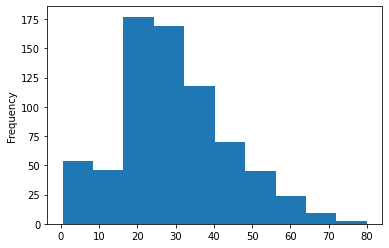

In [10]:
plt.figure()  
titanic_df['age'].plot(kind='hist',bins=10);

Clearly, most passengers ages fall between late teens and early 30s. We can also see that the number of passengers decreases as the age increases, with very few elderly people on the Titanic. However, there seems to be a pretty substanital population of children on the Titanic suggesting that most passengers were families. Now what are the best ways to deal with the missing age values?

### Using the mean or median values

One method that is a common practice when replacing missing values is to use the mean or median values. The mean refers to the average age within the dataset, while the median is the more centralized value of the dataset. Which one should be used? That depends on preference as well as outliers. If there are outliers that can skew the mean value, then sometimes its better to go with the median. However, I like to look at both values first in order to see how close in proximity they are. If there is not a substantial difference between the mean and median then picking either is okay.

In [11]:
titanic_df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

We can see that the mean value is 30 (when we round up) and the median value is 28. The mean value is slightly higher because of the outlier ages in the 60 to 80 range. However there is no significant difference between these values and either can be picked. For my purposes I'll stick with the mean value. Now, I will replace the NaN values with 29. 

In [12]:
# Replace NaN values using the .replace() method
titanic_df['age'].replace(np.NaN, 30.0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

### Using Other Columns to Determine Age

However, mean and median is not the only way to replace NaN values. Using mean or median generalizes the ages and may have you mislabeling ages. Maybe that passenger was a child, or an elderly individual. These are the risks we take when using a generalized value to describe a column. Is it a bad thing to do? No, not at all. Sometimes it's the only choice we have. In this scenario thought we could use the passengers name titles, such as Master and Miss, to group passengers into categories and use that average age in order to get a more precise age for each passenger.  

In [13]:
# Let's look at the Master title first
master = titanic_df[titanic_df.name.str.contains('master')]
master

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
7,0,3,"palsson, master. gosta leonard",male,2.00,3,1,21.0750,s
16,0,3,"rice, master. eugene",male,2.00,4,1,29.1250,q
50,0,3,"panula, master. juha niilo",male,7.00,4,1,39.6875,s
59,0,3,"goodwin, master. william frederick",male,11.00,5,2,46.9000,s
63,0,3,"skoog, master. harald",male,4.00,3,2,27.9000,s
65,1,3,"moubarek, master. gerios",male,NaN,1,1,15.2458,c
78,1,2,"caldwell, master. alden gates",male,0.83,0,2,29.0000,s
125,1,3,"nicola-yarred, master. elias",male,12.00,1,0,11.2417,c
159,0,3,"sage, master. thomas henry",male,NaN,8,2,69.5500,s
164,0,3,"panula, master. eino viljami",male,1.00,4,1,39.6875,s


I can see that the Master title refers to young male children. I can see that this age range goes from a few months in age to age 12. Let's find the mean value and replace the NaN values with tht value

In [14]:
# Find the mean average of the master class
titanic_df[titanic_df.name.str.contains('master')]['age'].mean()

4.574166666666667

In [15]:
master = master.replace(np.NaN, 5)
master

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
7,0,3,"palsson, master. gosta leonard",male,2.00,3,1,21.0750,s
16,0,3,"rice, master. eugene",male,2.00,4,1,29.1250,q
50,0,3,"panula, master. juha niilo",male,7.00,4,1,39.6875,s
59,0,3,"goodwin, master. william frederick",male,11.00,5,2,46.9000,s
63,0,3,"skoog, master. harald",male,4.00,3,2,27.9000,s
65,1,3,"moubarek, master. gerios",male,5.00,1,1,15.2458,c
78,1,2,"caldwell, master. alden gates",male,0.83,0,2,29.0000,s
125,1,3,"nicola-yarred, master. elias",male,12.00,1,0,11.2417,c
159,0,3,"sage, master. thomas henry",male,5.00,8,2,69.5500,s
164,0,3,"panula, master. eino viljami",male,1.00,4,1,39.6875,s


Great! The passengers designated with Master had their ages replaced with a mean of 5, which is far more accurate than a mean of 5. Let's add these updated ages back to the dataframe and then replace the rest of the values with the mean from earlier. Remember, it is possible to explore these ages deeper and detrmine more accurate ages for each title, but the purpose of this blog post is to just show xome examples of what can be done during the cleaning process.

In [22]:
# Concat dfs
titanic_df = pd.concat([titanic_df, master['age']], axis=1)

# Replace Master NaN values in age column
titanic_df['age'] = titanic_df['age'].groupby(level=0, axis=1).sum()

In [25]:
# Drop Duplicate age column
titanic_df = titanic_df.iloc[:, :-1]

In [28]:
# Now replace age NaN values with 5
titanic_df['age'] = titanic_df['age'].replace(np.NaN, 30)

In [30]:
# Let's check to see if we filled in all the NaN values
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       891 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   fare      891 non-null    float64
 8   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 101.9+ KB


Great the age column has been cleaned. I could definitely go deeper into the dataset, but I think showing the generic method, and a more thoughful method will do for know. Remember to be creative and try different things. Now let's work on the embarked data which only contains two missing values.

## Embarked

Embarked refers to the location where the passenger departed from on the Titanic. Let's look at the value counts and see how we can clean this column

In [31]:
# Show value counts
titanic_df['embarked'].value_counts()

s    644
c    168
q     77
Name: embarked, dtype: int64

I can see that majority of the passengers left from Southampton. Since it is only two missing values we can assume that those passengers left from Southampton. Let's replace those two missing values with s.

In [32]:
# Replace missing values with Southampton
titanic_df['embarked'] = titanic_df['embarked'].replace(np.NaN, 's')

# Look at value counts to check replacements
titanic_df['embarked'].value_counts()

s    646
c    168
q     77
Name: embarked, dtype: int64

In [33]:
# Show df info
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       891 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   fare      891 non-null    float64
 8   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 101.9+ KB


Great! All our columns have been cleaned

## Final Thoughts

As you can see, determining how to clean data takes time. Figure out what you want from this column and then determine the best way to fill those missing values. This dataset was very simple to clean, but with bigger datasets you may be able to use other columns in order to create new features. For example, in a dataset about homes you may have the year the home was built and the year that the information in the dataset was collected. You could subtract those two pieces of information in order to create a completely new feature called age. The things yo